## Import Libraries

In [32]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## Read CSV Format Data

In [33]:
source = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
df = pd.read_csv(source, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Set Data Headers

In [34]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Check the data

Goals pada bagian ini:
* Understand the data more deeply
* Identify missing values
* Identivy incorrect data type for each column

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

## Check for Data Duplicaton

In [36]:
df[df.duplicated(keep=False)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price


## Check for Incorrect Data Values

In the first step, I identified that the '?' symbol was used to fill in data with unknown values. This can interfere with the analysis process so it is necessary to identify columns that have symbols other than the values they should have.

In [37]:
#Identifies value other than alphabetic, numeric, and decimal operators (.)
df[df.applymap(lambda x: bool(re.search(r"[^a-zA-Z0-9.-]", str(x))) if pd.notna(x) else False)].stack()

C:\Users\Brandon Savero\AppData\Local\Temp\ipykernel_11476\1916957702.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[df.applymap(lambda x: bool(re.search(r"[^a-zA-Z0-9.-]", str(x))) if pd.notna(x) else False)].stack()


0    normalized-losses    ?
1    normalized-losses    ?
2    normalized-losses    ?
5    normalized-losses    ?
7    normalized-losses    ?
9    normalized-losses    ?
     price                ?
14   normalized-losses    ?
15   normalized-losses    ?
16   normalized-losses    ?
17   normalized-losses    ?
27   num-of-doors         ?
43   normalized-losses    ?
44   normalized-losses    ?
     price                ?
45   normalized-losses    ?
     price                ?
46   normalized-losses    ?
48   normalized-losses    ?
49   normalized-losses    ?
55   bore                 ?
     stroke               ?
56   bore                 ?
     stroke               ?
57   bore                 ?
     stroke               ?
58   bore                 ?
     stroke               ?
63   normalized-losses    ?
     num-of-doors         ?
66   normalized-losses    ?
71   normalized-losses    ?
73   normalized-losses    ?
74   normalized-losses    ?
75   normalized-losses    ?
82   normalized-loss

Some columns have a '?' symbol, and we can check how many rows of each column have that symbol.

In [38]:
df[df['peak-rpm'].str.contains(r"[^0-9.]", na=False)] #change the column name to check the others

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,?,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9295
131,2,?,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,?,?,23,31,9895


The we can transform the '?' symbol with null values to have better formatting

In [39]:
#clean data that contain any special character
df['price'] = df['price'].replace(r"[^0-9.]",np.nan, regex=True)
df['normalized-losses'] = df['normalized-losses'].replace(r"[^0-9.]",np.nan, regex=True)
df['num-of-doors'] = df['num-of-doors'].replace(r"[^a-zA-Z]",np.nan, regex=True)
df['bore'] = df['bore'].replace(r"[^0-9.]",np.nan, regex=True)
df['stroke'] = df['stroke'].replace(r"[^0-9.]",np.nan, regex=True)
df['horsepower'] = df['horsepower'].replace(r"[^0-9.]",np.nan, regex=True)
df['peak-rpm'] = df['peak-rpm'].replace(r"[^0-9.]",np.nan, regex=True)

#re-check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

The missing values in each column can now be identified 

## Drop Columns with Missing Values

The Price, num-of-doors, bore, stroke, and horsepower column only have a few missing values, then we can delete each of them. 

In [40]:
df = df.dropna(subset=['price', 'num-of-doors', 'bore', 'stroke', 'horsepower', 'peak-rpm'])

#re-check the data
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## Handle Missing Values in normalized-losses Column

There are a large number of missing values in the normalized-losses column, we will lose a lot of data if we just delete them.

Solution
* Fill the missing values with the mean value of each car make

In [41]:
#calculate mean for every car make
df1 = df.dropna(subset='normalized-losses') #exclude missing values data
df1['normalized-losses'] = df1['normalized-losses'].astype(int)
normalized_mean_permake = df1.groupby('make')['normalized-losses'].mean()
normalized_mean_permake

C:\Users\Brandon Savero\AppData\Local\Temp\ipykernel_11476\4081994515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['normalized-losses'] = df1['normalized-losses'].astype(int)


make
audi             161.000000
bmw              190.000000
chevrolet        100.000000
dodge            131.625000
honda            103.000000
jaguar           145.000000
mazda            114.454545
mercedes-benz    102.800000
mitsubishi       146.200000
nissan           135.166667
peugot           161.000000
plymouth         129.000000
porsche          186.000000
saab             127.000000
subaru            92.250000
toyota           110.290323
volkswagen       121.250000
volvo             91.454545
Name: normalized-losses, dtype: float64

In [42]:
#fill missing values with the mean value for every car make
df["normalized-losses"] = df.apply(lambda row: normalized_mean_permake.get(row["make"], 0) if pd.isna(row["normalized-losses"]) else row["normalized-losses"], axis=1)

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [43]:
#re-check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized-losses  193 non-null    object 
 2   make               193 non-null    object 
 3   fuel-type          193 non-null    object 
 4   aspiration         193 non-null    object 
 5   num-of-doors       193 non-null    object 
 6   body-style         193 non-null    object 
 7   drive-wheels       193 non-null    object 
 8   engine-location    193 non-null    object 
 9   wheel-base         193 non-null    float64
 10  length             193 non-null    float64
 11  width              193 non-null    float64
 12  height             193 non-null    float64
 13  curb-weight        193 non-null    int64  
 14  engine-type        193 non-null    object 
 15  num-of-cylinders   193 non-null    object 
 16  engine-size        193 non-null

## Data Type Re-Formatting

In [44]:
df[['normalized-losses', 'horsepower', 'peak-rpm', 'price']] = df[['normalized-losses', 'horsepower', 'peak-rpm', 'price']].astype(int)
df[['bore', 'stroke']] = df[['bore', 'stroke']].astype(float)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,161,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,161,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [45]:
#re-check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 193 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          193 non-null    int64  
 1   normalized-losses  193 non-null    int32  
 2   make               193 non-null    object 
 3   fuel-type          193 non-null    object 
 4   aspiration         193 non-null    object 
 5   num-of-doors       193 non-null    object 
 6   body-style         193 non-null    object 
 7   drive-wheels       193 non-null    object 
 8   engine-location    193 non-null    object 
 9   wheel-base         193 non-null    float64
 10  length             193 non-null    float64
 11  width              193 non-null    float64
 12  height             193 non-null    float64
 13  curb-weight        193 non-null    int64  
 14  engine-type        193 non-null    object 
 15  num-of-cylinders   193 non-null    object 
 16  engine-size        193 non-null

## Convert Fuel Consumption Measurement

The fuel consumption measurement in the data uses MPG/Miles per Gallons (city-mpg, highway-mpg). To simplify the calculation, it is converted to liters/100km.

In [46]:
df["highway_L/100km"] = 235/df["highway-mpg"] #formula to convert
df["city_L/100km"] = 235/df["city-mpg"]
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,highway_L/100km,city_L/100km
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,8.703704,11.190476
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,8.703704,11.190476
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,9.038462,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,7.833333,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,10.681818,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845,8.392857,10.217391
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045,9.400000,12.368421
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485,10.217391,13.055556
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470,8.703704,9.038462


In [47]:
#drop the columns
df = df.drop(columns=['city-mpg', 'highway-mpg'])
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,highway_L/100km,city_L/100km
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,13495,8.703704,11.190476
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,16500,8.703704,11.190476
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,16500,9.038462,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,13950,7.833333,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,17450,10.681818,13.055556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,16845,8.392857,10.217391
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19045,9.400000,12.368421
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,21485,10.217391,13.055556
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,22470,8.703704,9.038462


## Categorize Car Class base on Price

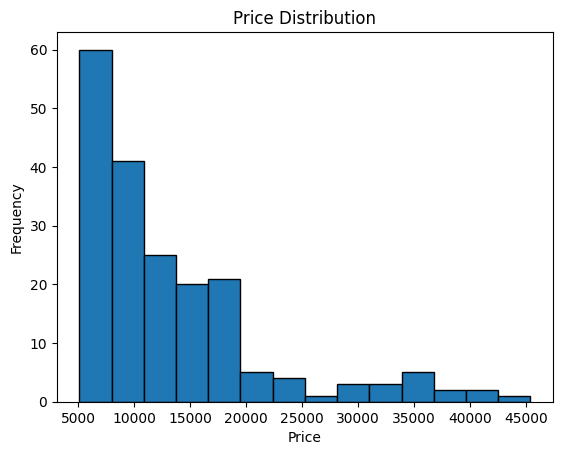

In [48]:
#check price distribution for binning
plt.hist(df['price'], bins= 'auto', edgecolor='black')  
plt.xlabel('Price')  
plt.ylabel('Frequency')  
plt.title('Price Distribution')  
plt.show()

In [49]:
#check data for specify price range
df[df['price'] <= 10000]
#df[(df['price'] > 10000) & (df['price'] <= 20000)]
#df[(df['price'] > 20000) & (df['price'] <= 30000)]
#df[df['price'] > 30000]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,highway_L/100km,city_L/100km
18,2,121,chevrolet,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.50,48,5100,5151,4.433962,5.000000
19,1,98,chevrolet,gas,std,two,hatchback,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.60,70,5400,6295,5.465116,6.184211
20,0,81,chevrolet,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.60,70,5400,6575,5.465116,6.184211
21,1,118,dodge,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.41,68,5500,5572,5.731707,6.351351
22,1,118,dodge,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.40,68,5500,6377,6.184211,7.580645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.00,85,5250,8195,6.911765,8.703704
186,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.00,85,5250,8495,6.911765,8.703704
187,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.40,23.00,68,4500,9495,5.595238,6.351351
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.00,100,5500,9995,7.343750,9.038462


In [50]:
#categorize car class by price
bins = [0, 10000, 20000, 30000, float('inf')]
labels = ['Low Class', 'Mid Class', 'High Class', 'Premium Class']
df['class_by_price'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,price,highway_L/100km,city_L/100km,class_by_price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,13495,8.703704,11.190476,Mid Class
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,16500,8.703704,11.190476,Mid Class
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,16500,9.038462,12.368421,Mid Class
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,13950,7.833333,9.791667,Mid Class
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,17450,10.681818,13.055556,Mid Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,9.5,114,5400,16845,8.392857,10.217391,Mid Class
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,mpfi,3.78,3.15,8.7,160,5300,19045,9.400000,12.368421,Mid Class
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,mpfi,3.58,2.87,8.8,134,5500,21485,10.217391,13.055556,High Class
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,idi,3.01,3.40,23.0,106,4800,22470,8.703704,9.038462,High Class


## Save Clean Data to CSV

In [52]:
output = "C:\\Users\\Brandon Savero\\Downloads\\clean_car_data.csv"
df.to_csv(output)